In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

## COMP 3122 - Artificial Intelligence with Python
__Week 9 lecture__

### [github.com/kamrik/ML1](https://github.com/kamrik/ML1)

### [slido.com/COMP3122](http://slido.com/COMP3122)

## The plan for today
 - Midterm questions
 - Nearest Neighbour classifier from scratch

## Videos by Kevin Markham
 * [Video playlist](https://www.dataschool.io/machine-learning-with-scikit-learn/) and [corresponding notebooks](https://github.com/justmarkham/scikit-learn-videos)
 * Linked from the front page of GitHub repo
 * kNN is explained in video #4


## Book - chapter 5
 - Overview of sklearn is in sections 5.0 to 5.4
 - Linear regression is in section 5.6

## kNN
 - switching to whiteboard

In [2]:
df = sns.load_dataset('iris')
df=df[df.species != 'setosa']
df = df.reset_index()
df = df[['petal_length', 'petal_width', 'species']]

In [3]:
df.head()

,petal_length,petal_width,species
0,4.7,1.4,versicolor
1,4.5,1.5,versicolor
2,4.9,1.5,versicolor
3,4.0,1.3,versicolor
4,4.6,1.5,versicolor


In [4]:
# A new point we would like to classify
p = np.array([4.5, 1.1])

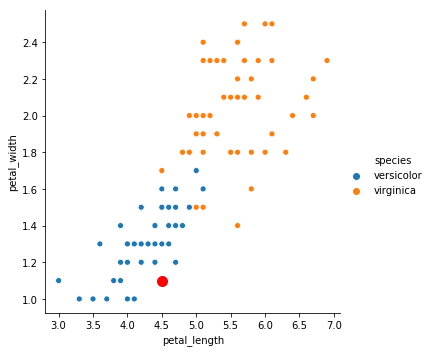

In [5]:
sns.relplot('petal_length', 'petal_width', data=df, kind='scatter', hue='species')
plt.plot([p[0]], [p[1]], 'ro', markersize=10)
# plt.plot(X[closest, 0], X[closest, 1], 'mx', markersize=10)

In [6]:
p

array([4.5, 1.1])

In [7]:
df.head()

,petal_length,petal_width,species
0,4.7,1.4,versicolor
1,4.5,1.5,versicolor
2,4.9,1.5,versicolor
3,4.0,1.3,versicolor
4,4.6,1.5,versicolor


In [8]:
X = df[['petal_length', 'petal_width']].values
y = df['species'].values

In [9]:
X.shape

(100, 2)

In [11]:
# Find the flower with the smallest distance 
X[0,:]

array([4.7, 1.4])

In [12]:
# Simple kNN
class KNN:
    def __init__(self, k):
        self.k = k
        
    def fit(self, X, y):
        self.X = X
        self.y = y
        
    def predict(self, x):
        dists2 = ((self.X - x)**2).sum(axis=1)
        closest_k = dists2.argsort()[:self.k]
        return self.y[closest_k] 

In [13]:
knn = KNN(3)
knn.fit(X, y)
knn.predict(p)

array(['versicolor', 'versicolor', 'versicolor'], dtype=object)

# sklearn

In [14]:
# 1. Import
from sklearn.neighbors import KNeighborsClassifier

In [15]:
# 2. Instantiate (with tuning parameters)
nn = KNeighborsClassifier(n_neighbors=3)

In [16]:
# 3. Fit
nn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [17]:
# 4. Predict
nn.predict([[6, 2]])

array(['virginica'], dtype=object)

In [97]:
# closest_idx = np.sqrt(((df[['petal_length', 'petal_width']] - z)**2).sum(axis=1)).idxmin()